# Занятие 7. Поиск отдельных видео, хорошо репрезентирующих совокупность всех релевантных видео


[x] Определите тип шкалы переменных statistics.viewCount, statistics.likeCount, statistics.dislikeCount, statistics.commentCount.
[x] Определите, какие методы описательной статистики релевантны исследуемым переменным с т.з. типа шкалы последних.
[x] Примените выбранные методы описательной статистики относительно каждой исследуемой переменной, чтобы познакомиться с ней: (а) постройте её распределение,
(б) найдите значение, репрезентирующее по данной переменной всю совокупность видео,
(в) оцените, насколько этому значению можно доверять,
(г) найдите видео, наиболее репрезентирующие совокупность по исследуемым переменным; посмотрите эти видео и комментарии к ним; проведите анализ в качественной парадигме.

[x] Определите тип шкалы переменной categoryName.
[x] Определите, какие методы описательной статистики релевантны исследуемой переменной с т.з. типа шкалы последней.
[x] Примените выбранные методы описательной статистики относительно исследуемой переменной, чтобы познакомиться с ней: (а) постройте её распределение,
(б) найдите значение, репрезентирующее по данной переменной всю совокупность видео,
(в) оцените, насколько этому значению можно доверять,
(г) найдите видео, наиболее репрезентирующее совокупность по исследуемой переменной; посмотрите это видео и комментарии к нему; проведите анализ в качественной парадигме.
[x] Выводы впишите в скрипт в формате комментариев или Markdown.
[x] Обогатите визуализацию описательной статистики для каналов и видео. выгруженных на занятиях соответствующей уч.дисциплины в социологическом бакалавриате ВШЭ, посредством построения интерактивных диаграм.
[x] Постройте облако слов на основе любой из выгруженных на прошлых занятиях текстовых характеристик
[x] Если всё получилось, нажмите Kernel -> Restart & Run All для автоматического последовательного запуска всех чанков.
[x] Покажите результат преподавателю.

In [2]:
# 1 загрузка конфига и путей
import pathlib
import yaml

ROOT = pathlib.Path().resolve().parent.parent

with open(ROOT / "config.yml", "r") as f:
    config = yaml.safe_load(f)

In [3]:
# 2 Загрузка данных о видео

DATA_PATH = ROOT / config['api']['DATA_PATH']
print(DATA_PATH)

/Users/andrey/PycharmProjects/DataMiningProjects/data


In [4]:
# 3 импорт необходимых библиотек

import randan as rd
import googleapiclient.discovery as api
import pandas as pd
import numpy as np

In [5]:
# 4 загрузка данных

df_korean = pd.read_excel(DATA_PATH / 'video' / 'Video_characteristics_Корейская_косметика.xlsx')

In [6]:
# 5 загрузка данных

df_korean.head()

,kind,etag,id,snippet.publishedAt,snippet.channelId,snippet.title,snippet.description,snippet.thumbnails.default.url,snippet.thumbnails.default.width,snippet.thumbnails.default.height,...,statistics.favoriteCount,statistics.commentCount,player.embedHtml,topicDetails.topicCategories,snippet.defaultLanguage,liveStreamingDetails.actualStartTime,liveStreamingDetails.actualEndTime,liveStreamingDetails.scheduledStartTime,statistics.dislikesCount,categoryName
0,youtube#video,hFWHeWO-R7oU4c2XL_XGUFSW0Ro,Wi49rKRM85U,2022-06-20T12:57:48Z,UCphnZS52v_lkv5RSl5n70tQ,한국인들은 절대 안사는 화장품 КОСМЕТИКА КОТОРАЯ КОРЕЯНКИ ВО...,⚫подписаться: https://goo.gl/3QbeUf\n---------...,https://i.ytimg.com/vi/Wi49rKRM85U/default.jpg,120,90,...,0,1065.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,595.0,People & Blogs
1,youtube#video,dH5eRX5ktvZc5h6hZepKAsK6zSo,1ErvLvQoYxc,2019-03-21T10:23:49Z,UC6C0oFYlpKkFGG-ykqM4fYw,ТЫ ДОЛЖНА ЭТО ПОПРОБОВАТЬ! ЛУЧШАЯ КОРЕЙСКАЯ КО...,"Хорошие мои, сегодня я расскажу вам про свой к...",https://i.ytimg.com/vi/1ErvLvQoYxc/default.jpg,120,90,...,0,378.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,192.0,Howto & Style
2,youtube#video,VAaYvq0w2V6n-a6E6upg2A1iJbE,aiY0ymL25Pw,2021-08-20T08:51:18Z,UCiT7bPorr4rKJU8WFBZA9Og,РЕАКЦИЯ дерматолога: 10 этапов корейского уход...,Мой телеграм:\nhttps://t.me/dr_amina_pirmanova...,https://i.ytimg.com/vi/aiY0ymL25Pw/default.jpg,120,90,...,0,1777.0,"<iframe width=""480"" height=""270"" src=""//www.yo...","['https://en.wikipedia.org/wiki/Health', 'http...",NaN,NaN,NaN,NaN,279.0,People & Blogs
3,youtube#video,Xu0qxfp0-q2X2DrGsPlfAAn6nqM,JA9E4TCVsDU,2015-12-06T14:30:40Z,UCNazbf-kLY6E8TO_o48ZExQ,КАК Я ИСПОРТИЛА КОЖУ: КОРЕЙСКАЯ КОСМЕТИКА\Tony...,Привет! Корейская косметика снова набирает обо...,https://i.ytimg.com/vi/JA9E4TCVsDU/default.jpg,120,90,...,0,324.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,555.0,Howto & Style
4,youtube#video,1G4hAX30sQ9cKXA2lX2UD6wUbuY,NAeXVpMTiT4,2018-04-20T15:19:56Z,UCmXGqfEsluA1fID55bVexjw,🇰🇷 НЕВЕРОЯТНАЯ КОРЕЙСКАЯ КОСМЕТИКА! Топовые шт...,Магазин корейской косметики https://goo.gl/UJG...,https://i.ytimg.com/vi/NAeXVpMTiT4/default.jpg,120,90,...,0,687.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,397.0,Howto & Style


In [7]:
# 6 

df_korean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   kind                                     1315 non-null   object 
 1   etag                                     1315 non-null   object 
 2   id                                       1315 non-null   object 
 3   snippet.publishedAt                      1315 non-null   object 
 4   snippet.channelId                        1315 non-null   object 
 5   snippet.title                            1315 non-null   object 
 6   snippet.description                      1045 non-null   object 
 7   snippet.thumbnails.default.url           1315 non-null   object 
 8   snippet.thumbnails.default.width         1315 non-null   int64  
 9   snippet.thumbnails.default.height        1315 non-null   int64  
 10  snippet.thumbnails.medium.url            1315 no

In [13]:
df_korean

,kind,etag,id,snippet.publishedAt,snippet.channelId,snippet.title,snippet.description,snippet.thumbnails.default.url,snippet.thumbnails.default.width,snippet.thumbnails.default.height,...,statistics.favoriteCount,statistics.commentCount,player.embedHtml,topicDetails.topicCategories,snippet.defaultLanguage,liveStreamingDetails.actualStartTime,liveStreamingDetails.actualEndTime,liveStreamingDetails.scheduledStartTime,statistics.dislikesCount,categoryName
0,youtube#video,hFWHeWO-R7oU4c2XL_XGUFSW0Ro,Wi49rKRM85U,2022-06-20T12:57:48Z,UCphnZS52v_lkv5RSl5n70tQ,한국인들은 절대 안사는 화장품 КОСМЕТИКА КОТОРАЯ КОРЕЯНКИ ВО...,⚫подписаться: https://goo.gl/3QbeUf\n---------...,https://i.ytimg.com/vi/Wi49rKRM85U/default.jpg,120,90,...,0,1065.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,595.0,People & Blogs
1,youtube#video,dH5eRX5ktvZc5h6hZepKAsK6zSo,1ErvLvQoYxc,2019-03-21T10:23:49Z,UC6C0oFYlpKkFGG-ykqM4fYw,ТЫ ДОЛЖНА ЭТО ПОПРОБОВАТЬ! ЛУЧШАЯ КОРЕЙСКАЯ КО...,"Хорошие мои, сегодня я расскажу вам про свой к...",https://i.ytimg.com/vi/1ErvLvQoYxc/default.jpg,120,90,...,0,378.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,192.0,Howto & Style
2,youtube#video,VAaYvq0w2V6n-a6E6upg2A1iJbE,aiY0ymL25Pw,2021-08-20T08:51:18Z,UCiT7bPorr4rKJU8WFBZA9Og,РЕАКЦИЯ дерматолога: 10 этапов корейского уход...,Мой телеграм:\nhttps://t.me/dr_amina_pirmanova...,https://i.ytimg.com/vi/aiY0ymL25Pw/default.jpg,120,90,...,0,1777.0,"<iframe width=""480"" height=""270"" src=""//www.yo...","['https://en.wikipedia.org/wiki/Health', 'http...",NaN,NaN,NaN,NaN,279.0,People & Blogs
3,youtube#video,Xu0qxfp0-q2X2DrGsPlfAAn6nqM,JA9E4TCVsDU,2015-12-06T14:30:40Z,UCNazbf-kLY6E8TO_o48ZExQ,КАК Я ИСПОРТИЛА КОЖУ: КОРЕЙСКАЯ КОСМЕТИКА\Tony...,Привет! Корейская косметика снова набирает обо...,https://i.ytimg.com/vi/JA9E4TCVsDU/default.jpg,120,90,...,0,324.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,555.0,Howto & Style
4,youtube#video,1G4hAX30sQ9cKXA2lX2UD6wUbuY,NAeXVpMTiT4,2018-04-20T15:19:56Z,UCmXGqfEsluA1fID55bVexjw,🇰🇷 НЕВЕРОЯТНАЯ КОРЕЙСКАЯ КОСМЕТИКА! Топовые шт...,Магазин корейской косметики https://goo.gl/UJG...,https://i.ytimg.com/vi/NAeXVpMTiT4/default.jpg,120,90,...,0,687.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,397.0,Howto & Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,youtube#video,wnooTiYmWg1RbmxHA16uQ7ZJhKQ,QdFBJTWrXGQ,2022-04-06T09:05:51Z,UCBXqiEMJMVTXeQfcZ2M6sow,Atomy The Fame | Корейская косметика,Для заказа заполняйте анкету для регистрации н...,https://i.ytimg.com/vi/QdFBJTWrXGQ/default.jpg,120,90,...,0,1.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,0.0,People & Blogs
1311,youtube#video,dDMWPkWbXFHTb5JMpjUgBZvHIsU,WDaSYoc6Cbo,2023-01-05T04:42:56Z,UCM7-Frn5Zz4aXplhkaGI5zg,ПЕНКА ДЛЯ УМЫВАНИЯ ЛИЦА КОРЕЙСКАЯ КОСМЕТИКА ☎️...,NaN,https://i.ytimg.com/vi/WDaSYoc6Cbo/default.jpg,120,90,...,0,0.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,0.0,People & Blogs
1312,youtube#video,66bPDJ5bsTweNPI7uFprdPd1Zt8,E2xdveEfT2Y,2022-10-17T14:14:46Z,UCbOs6A4SJYanjQXsooKi0Fg,КОРЕЙСКИЙ МАКИЯЖ ДЛЯ НАЧИНАЮЩИХ 🤩😍 #тень #м...,NaN,https://i.ytimg.com/vi/E2xdveEfT2Y/default.jpg,120,90,...,0,0.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,0.0,People & Blogs
1313,youtube#video,Lm84VayHJd3jOM_UqYjUm5LKvf4,VcnXkDXeF-Y,2022-11-18T16:07:00Z,UCM7-Frn5Zz4aXplhkaGI5zg,КОРЕЙСКАЯ КОСМЕТИКА №1 📱+998935594555✍🏻 ТЕЛЕГР...,NaN,https://i.ytimg.com/vi/VcnXkDXeF-Y/default.jpg,120,90,...,0,0.0,"<iframe width=""480"" height=""270"" src=""

# Содержательная задача 1.

** Переменные `viewCount`, `likeCount`, `dislikesCount`, `commentCount` относятся к интервальному типу**

In [14]:
from randan.descriptive_statistics import ScaleStatistics, OrdinalStatistics, NominalStatistics

In [15]:
# 7 описательная статистика



ss = ScaleStatistics(df_korean, ['statistics.viewCount',
                          'statistics.likeCount',
                          'statistics.commentCount',
                                 'statistics.dislikesCount'],
                     normality_test=True)



SCALE STATISTICS SUMMARY
------------------



/Users/andrey/PycharmProjects/DataMiningProjects/.venv/lib/python3.10/site-packages/randan/descriptive_statistics.py:491: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(n_decimals))


,N,mode,median,mean,25%,75%,interquart. range,interquart. range (norm.),min,max,range,std,var,entropy coef.,quality var.
statistics.viewCount,1315.000,48.000,1357.000,22153.693,249.500,7802.500,7553.000,0.004,0.000,1822564.000,1822564.000,100170.570,10034143030.807,0.985,1.000
statistics.likeCount,1284.000,1.000,42.500,972.755,8.000,305.250,297.250,0.004,0.000,81849.000,81849.000,4826.985,23299781.482,0.864,0.990
statistics.commentCount,1299.000,0.000,4.000,68.354,0.000,36.500,36.500,0.003,0.000,13022.000,13022.000,431.534,186221.842,0.684,0.899
statistics.dislikesCount,1313.000,0.000,0.000,19.728,0.000,5.000,5.000,0.001,0.000,4684.000,4684.000,157.368,24764.681,0.438,0.605



NORMALITY TESTS
------------------



/Users/andrey/PycharmProjects/DataMiningProjects/.venv/lib/python3.10/site-packages/randan/descriptive_statistics.py:460: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(n_decimals))


,statistic,p-value
statistics.viewCount,0.412,0.000
statistics.likeCount,0.420,0.000
statistics.commentCount,0.437,0.000
statistics.dislikesCount,0.450,0.000


In [16]:
# 8 Суммарные значения
ss.summary()

,N,mode,median,mean,25%,75%,interquart. range,interquart. range (norm.),min,max,range,std,var,entropy coef.,quality var.
statistics.viewCount,1315.0,48.0,1357.0,22153.692776,249.5,7802.50,7553.00,0.004144,0.0,1822564.0,1822564.0,100170.569684,1.003414e+10,0.985176,0.999694
statistics.likeCount,1284.0,1.0,42.5,972.755452,8.0,305.25,297.25,0.003632,0.0,81849.0,81849.0,4826.984719,2.329978e+07,0.863502,0.990473
statistics.commentCount,1299.0,0.0,4.0,68.354119,0.0,36.50,36.50,0.002803,0.0,13022.0,13022.0,431.534288,1.862218e+05,0.683720,0.899213
statistics.dislikesCount,1313.0,0.0,0.0,19.728104,0.0,5.00,5.00,0.001067,0.0,4684.0,4684.0,157.367981,2.476468e+04,0.438101,0.605393



В качестве используемой меры центральной тенденции мы предлагаем использовать медиану.

Общее количество данных - 680


 ### Переменная `viewCount`

Median - 6725

 ### Переменная `likeCount`

Median - 42.5

 ### Переменная `likeCount`

Median - 42.5



 ### Переменная `commentCount`

Median - 4


In [17]:
# 9 вспомогательная функция

def get_typical_by_median(df, column):

    lower = np.nanpercentile(df_korean[column], 49)
    upper = np.nanpercentile(df_korean[column], 51)
    tmp_df = df[(df[column] >= lower) & (df[column] <= upper)][
    ['id', 'snippet.channelId','snippet.title','snippet.description', 'snippet.publishedAt',
        'snippet.tags', 'snippet.categoryId', 'categoryName']]

    display(tmp_df)
    return tmp_df


## statistics.viewCount

In [ ]:
# 10 График распределения statistics.viewCount
import plotly.express as px

fig = px.histogram(df_korean, y="statistics.viewCount",
                   marginal="box")
fig.show()

In [19]:
# 11 Типичные видео statistics.viewCount 2%

view_df = get_typical_by_median(df_korean, 'statistics.viewCount')

,id,snippet.channelId,snippet.title,snippet.description,snippet.publishedAt,snippet.tags,snippet.categoryId,categoryName
112,hSw7mJTVoEs,UCEn1GhJDb9r-kBALjGNwiEA,КОРЕЙСКАЯ КОСМЕТИКА 🇰🇷🌸 Распаковка | Где заказ...,Telegram \nМой: https://t.me/klnmvl \nАни: ht...,2022-05-12T10:00:19Z,"['корея', 'корейская косметика', 'корейский ух...",22,People & Blogs
144,YPMujOSDszY,UCGlTQCQauXBoDLMc8tsd78w,Крем для рук АТОМИ с керамидами и витамином Е ...,NaN,2023-02-04T10:22:52Z,NaN,22,People & Blogs
162,7TM3OHKYMbM,UCdVj_gJ0l3oy-Bp6wniXfIw,💖КОРЕЙСКАЯ КОСМЕТИКА 💖ДОСТУПНЫЙ УХОД 40+ 💖ТЕСТ...,💥 Telegram : https://t.me/jannafetisovablog\n...,2023-02-02T17:56:57Z,"['макияж', 'возрастная кожа', '45+ зрелая', 'у...",22,People & Blogs
223,Ep1jsX08B9w,UCVstsMd_kCVhAtAEPVYrMeg,Pyunkang Yul Отзывы ✔ Корейская Косметика,Все мои Видео о Корейской косметике здесь👇 htt...,2021-09-08T09:07:28Z,"['Pyunkang Yul', 'Pyunkang Yul Отзывы', 'Корей...",26,Howto & Style
244,afLaKJso7lI,UCY6sjx4ReMCHJUxh92HQfQA,Корейская косметика Cos De Baha – обзор самых ...,Магазин корейской косметики https://newskin.co...,2021-10-13T17:00:02Z,"['корейская косметика', 'кос де баха', 'косдеб...",27,Education
245,ksFYWbOE8XY,UCC6c2sybMuU_79BhhjknVnQ,✅ #iHerb | Распаковка и обзор посылки | корейс...,#iherb #посылка #распаковка #айхерб #витамины\...,2022-11-19T14:00:23Z,"['iherb', 'unpacking', 'TonyMoly rice Enzyme p...",22,People & Blogs
385,DqRho-pJBxk,UCtAsmkjgnR4vHGUSgey2EXg,АСМР/ASMR РАСПАКОВКА🎁Корейская косметика💄,❤️Если хотите поддержать меня и мой канал:\n\n...,2023-01-02T18:00:07Z,['#асмр#asmr#распаковка#подарки#косметика#коре...,22,People & Blogs
416,nPNpeLjwmlw,UCmnfTQHyj9fjFQNNeF_QZsg,КОРЕЙСКИЙ УХОД РАБОТАЕТ//ШИКАРНАЯ КОРЕЙСКАЯ КО...,Всем привет! Я настоящий поклонник корейской к...,2022-03-02T15:57:41Z,"['beauty', 'лучшая корейская косметика', 'коре...",26,Howto & Style
445,Gxp5vbhKsdE,UCxIt5xlqDrY5HM_ODClmJEA,Крутые Покупки С Wildberries Носочки И Коре...,Приятно делать покупки для нас любимых .Да еще...,2023-02-01T04:00:05Z,"['wildberries', 'вайлдберриз', 'вайлдберис', '...",26,Howto & Style
511,t5fFojD4Ips,UCq0Ez2K7ODRO9_VLZeD9ioA,Парфумована олія для гладкості волосся #Masil ...,Парфумована олія для гладкості волосся #Masil ...,2023-02-05T17:18:39Z,"['Masil', 'Уход за волосами', 'корейская косме...",22,People & Blogs


## statistics.likeCount

In [20]:
# 12 График распределения statistics.likeCount

import plotly.express as px

fig = px.histogram(df_korean, y="statistics.likeCount",
                   marginal="box")
fig.show()

In [21]:
# 13 Типичные видео 2%

likes_df = get_typical_by_median(df_korean, 'statistics.likeCount')

,id,snippet.channelId,snippet.title,snippet.description,snippet.publishedAt,snippet.tags,snippet.categoryId,categoryName
81,IphWpmC-YfQ,UCtAsmkjgnR4vHGUSgey2EXg,АСМР/ASMR Korean cosmetics❤️Корейская косметик...,❤️Если хотите поддержать меня и мой канал:\n\n...,2023-01-30T18:00:09Z,['#асмр#asmr#koreancosmetics#корейскаякосметик...,22,People & Blogs
209,DY6s2YNWMoE,UCO3qqEPXZqY3-smnCt1iy4Q,11.11 ФЕСТИВАЛЬ СКИДОК В HOLLYSHOP ⚡ КОРЕЙСКАЯ...,ФЕСТИВАЛЬ СКИДОК ДО 50% НА ВСЁ АКТИВИРОВАН 🚀 \...,2022-11-08T14:00:07Z,"['фестиваль скидок', '11 11', '11 11 алиэкспре...",26,Howto & Style
234,yMVJUuIIMFw,UCiRG7uK7jYLhM0DAzvTlNmg,ОБЗОР Корейская косметика | Совместные покупки...,В этом выпуске вы увидите ХИТ закупки на корей...,2020-08-04T13:00:18Z,"['63pokupki', 'Корейскаякосметика', 'совместны...",22,People & Blogs
279,YNwydCBEirA,UC7HErGueZvnc0lpQCkTq0mw,Корейская косметика Атоми. Распаковка посылки.,Интернет магазин корейской косметики.\nКорейск...,2022-10-20T12:14:02Z,"['косметика', 'косметика в турции', 'корейская...",22,People & Blogs
295,Kf3OTXHs0X0,UCO3qqEPXZqY3-smnCt1iy4Q,УХОД ВО ВРЕМЯ БЕРЕМЕННОСТИ 🤰 КОРЕЙСКАЯ КОСМЕТИ...,Личная рекомендация 🙌 Наша Алина показывает лю...,2023-01-04T08:15:01Z,"['уход во время беременности', 'беременность',...",26,Howto & Style
406,6aSmSlWNM_E,UCMGpZfwsrFyLug3hBdAJmrg,😂МЕНЯ УЖЕ НЕ ОСТАНОВИТЬ😂 АТОМИ МНОГО НЕ БЫВАЕТ...,😂МЕНЯ УЖЕ НЕ ОСТАНОВИТЬ😂 АТОМИ МНОГО НЕ БЫВАЕТ...,2022-12-23T14:51:46Z,"['МЕНЯ УЖЕ НЕ ОСТАНОВИТЬ', 'АТОМИ МНОГО НЕ БЫВ...",22,People & Blogs
483,41tYptTDVks,UCWWfqePLqjsMhxj-dFLgBsQ,Корейская косметика купить в Белгороде-Днестро...,Интернет магазин Cosmetic Market \nКорейская к...,2021-06-15T01:09:57Z,"['Корейская косметика', 'Косметика для волос',...",22,People & Blogs
540,DXfd4rwHUfU,UCHSiWxTtQBpO6hpiAjYS7tQ,УХОД ЗА КОЖЕЙ : ПУСТЫЕ БАНОЧКИК | КОРЕЙСКАЯ И ...,Всем привет и добро пожаловать в первую часть ...,2023-01-27T08:29:23Z,"['пустые баночки', 'корейская косметика', 'япо...",26,Howto & Style
589,TUITV0cldTw,UCncWRpGk381KdQRpKuq1kdA,КОРЕЙСКАЯ КОСМЕТИКА ATOMY/LIVE TEST/ СТОИТ ЛИ ...,Всем привет! \nСегодня расскажу о новинке в Ге...,2022-09-26T05:00:21Z,['#atomy #корейскаякосметика #очищениекожи #за...,22,People & Blogs
611,7eY7WZfFw5s,UCYxxrV1NnnSb27kkhKhl-QA,Солнцезащитный кушон корейская косметика #кор...,NaN,2022-06-21T11:26:13Z,NaN,22,People & Blogs


## statistics.dislikesCount

In [22]:
# 14 График распределения statistics.dislikesCount

import plotly.express as px

fig = px.histogram(df_korean, y="statistics.dislikesCount",
                   marginal="box")
fig.show()

In [23]:
# 15 Типичные видео 2%

dislike_df = get_typical_by_median(df_korean, 'statistics.dislikesCount')

,id,snippet.channelId,snippet.title,snippet.description,snippet.publishedAt,snippet.tags,snippet.categoryId,categoryName
35,QAKvbsO6MQg,UC0yl669fwnBw4YrG2qEvzzg,"Корейская Косметика, Обзор и Впечатление - Mis...",:::Для лучшего просмотра выбери HD:::\n_\nВсем...,2014-07-24T04:23:23Z,"['Beauty', 'Haul', 'Fashion Blog', 'Shopping',...",26,Howto & Style
49,BGh-xG0oJ60,UC2BdFt3qA23y5cFPxp5azjw,Корейская косметика,NaN,2022-07-27T14:07:04Z,NaN,22,People & Blogs
50,TtVjXWfKoUg,UCYZj_Ybvxmui3fAtbu95L2w,"Убрать пигментные пятна на лице, темные точки ...","Многие страдают от пигментных пятен, потемнени...",2021-05-26T15:15:02Z,"['корейский косметос', 'корейская косметика', ...",22,People & Blogs
52,uRXqiEMy-xU,UCnnv33Mtm4I7CAvms3xXTPw,Корейская косметика Азбука Красоты,"Интернет магазин корейской косметики ""Азбука К...",2019-03-29T10:28:44Z,"['корейскаякосметика', 'косметика', 'азбукакра...",22,People & Blogs
54,gYN23HtidIM,UCoUnIXnOi8wD3xCXxwu7sAA,🌸 Корейская Косметика в США #корейскаякосметика,NaN,2023-02-04T18:33:23Z,NaN,22,People & Blogs
...,...,...,...,...,...,...,...,...
1310,QdFBJTWrXGQ,UCBXqiEMJMVTXeQfcZ2M6sow,Atomy The Fame | Корейская косметика,Для заказа заполняйте анкету для регистрации н...,2022-04-06T09:05:51Z,NaN,22,People & Blogs
1311,WDaSYoc6Cbo,UCM7-Frn5Zz4aXplhkaGI5zg,ПЕНКА ДЛЯ УМЫВАНИЯ ЛИЦА КОРЕЙСКАЯ КОСМЕТИКА ☎️...,NaN,2023-01-05T04:42:56Z,NaN,22,People & Blogs
1312,E2xdveEfT2Y,UCbOs6A4SJYanjQXsooKi0Fg,КОРЕЙСКИЙ МАКИЯЖ ДЛЯ НАЧИНАЮЩИХ 🤩😍 #тень #м...,NaN,2022-10-17T14:14:46Z,NaN,22,People & Blogs
1313,VcnXkDXeF-Y,UCM7-Frn5Zz4aXplhkaGI5zg,КОРЕЙСКАЯ КОСМЕТИКА №1 📱+998935594555✍🏻 ТЕЛЕГР...,NaN,2022-11-18T16:07:00Z,NaN,22,People & Blogs


## statistics.commentCount

In [24]:
# 16 График распределения statistics.dislikesCount

import plotly.express as px

fig = px.histogram(df_korean, y="statistics.commentCount",
                   marginal="box")
fig.show()

In [25]:
# 17 Типичные видео 2%

comment_df = get_typical_by_median(df_korean, 'statistics.commentCount')

,id,snippet.channelId,snippet.title,snippet.description,snippet.publishedAt,snippet.tags,snippet.categoryId,categoryName
63,pr2oaRp73z8,UCT81cNlRGjQnXrVlX-OCKgQ,Популярная корейская косметика | Olive Young |...,"Безвизовый режим с Южной Кореей отменяют, тепе...",2022-03-23T10:13:54Z,"['корея', 'южная корея', 'жизнь в корее', 'вло...",22,People & Blogs
65,zvnPI1lcE64,UCeSgru4kjjPxefh63cYaGtg,Корейская косметика с Валдберис,NaN,2022-03-12T10:18:22Z,NaN,22,People & Blogs
69,2CcUgejvbEA,UCgE2kYTz_baDoM9JN8aQKKA,Корейская косметика Tiam. Мои фавориты,NaN,2022-08-31T06:00:01Z,"['корейская косметика', 'косметика', 'уход за ...",22,People & Blogs
78,kxcqtSGsi-0,UCY6sjx4ReMCHJUxh92HQfQA,Корейская косметика новинки 2021 – лучшие сред...,Интернет магазин корейской косметики https://n...,2021-08-21T17:00:40Z,"['корейская косметика', 'корейская косметика у...",27,Education
112,hSw7mJTVoEs,UCEn1GhJDb9r-kBALjGNwiEA,КОРЕЙСКАЯ КОСМЕТИКА 🇰🇷🌸 Распаковка | Где заказ...,Telegram \nМой: https://t.me/klnmvl \nАни: ht...,2022-05-12T10:00:19Z,"['корея', 'корейская косметика', 'корейский ух...",22,People & Blogs
...,...,...,...,...,...,...,...,...
1232,2sKiSn8gAwY,UCfolqt5CN3uRObR94XpebpA,Лучшая корейская косметика. Ночная маска Yuja ...,Мой Инстаграм @korea_svet Подписывайтесь. Я п...,2020-02-01T19:55:16Z,"['лучшая корейская косметика', 'ночная маска',...",26,Howto & Style
1240,Qb3zY7DutGI,UCPe7dCZRmrCjYobHGkO7vnA,Корейская косметика ✨ STYLEKOREAN ✨ JUMISO ✨ ...,Люблю корейскую уходовую косметику всем сердце...,2022-02-18T10:41:15Z,NaN,22,People & Blogs
1244,BUNYhhnKKVM,UCNTmeOK5IvSN7adHNd51X8g,Странная корейская косметика🤫,Понравилось? - поставь лайк🤡. Хочешь поделитьс...,2022-10-29T12:40:46Z,NaN,23,Comedy
1271,Ot33zYyZGh8,UCYYnmDQDweu97uFiJv0SZRA,#IHerb. Новая посылка. Корейская уходовая косм...,#новая посылка #корейскаякосметика #IHerb\nВ э...,2022-05-05T21:22:31Z,NaN,26,Howto & Style


In [26]:
# 18 Intersection of 2 %
id_set = set()

interval_sets = {'View': set(view_df['id']),
                 'Like': set(likes_df['id']),
                 'Dislike': set(dislike_df['id']),
                 'Comment': set(comment_df['id'])}




In [27]:
# 19 Комбинации
from itertools import combinations

comb_2 = combinations(interval_sets.keys(), 2)
comb_3 = combinations(interval_sets.keys(), 3)

In [28]:
# 20 Пересечения общих частей по 2-м совпадениям

for pair in comb_2:
    print(f'Общая часть от пересечения {pair[0]} + {pair[1]}', len(interval_sets[pair[0]] & interval_sets[pair[1]]))

Общая часть от пересечения View + Like 2
Общая часть от пересечения View + Dislike 28
Общая часть от пересечения View + Comment 2
Общая часть от пересечения Like + Dislike 29
Общая часть от пересечения Like + Comment 2
Общая часть от пересечения Dislike + Comment 47


In [29]:
# 21 Пересечения общих частей по 3-м совпадениям

for pair in comb_3:
    print(f'Общая часть от пересечения {pair[0]} + {pair[1]} + {pair[2]}', len(interval_sets[pair[0]] & interval_sets[pair[1]] & interval_sets[pair[2]]))

Общая часть от пересечения View + Like + Dislike 2
Общая часть от пересечения View + Like + Comment 0
Общая часть от пересечения View + Dislike + Comment 2
Общая часть от пересечения Like + Dislike + Comment 1


# 2.1. Определите тип шкалы переменной categoryName.

**CategoryName - номинальная шкала**

Видосы:

1. Гистограмма
2. Боксплот
3. Мода

In [30]:
# 22 Номинальная статистика

ns = NominalStatistics(df_korean, ['categoryName'])


NOMINAL STATISTICS SUMMARY
------------------



/Users/andrey/PycharmProjects/DataMiningProjects/.venv/lib/python3.10/site-packages/randan/descriptive_statistics.py:72: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,N,mode,entropy coef.,quality var.
categoryName,1309,People & Blogs,0.366,0.498



FREQUENCIES
------------------

variable: categoryName


/Users/andrey/PycharmProjects/DataMiningProjects/.venv/lib/python3.10/site-packages/randan/descriptive_statistics.py:93: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,N,%
People & Blogs,927,70.817
Howto & Style,292,22.307
Education,36,2.750
Entertainment,20,1.528
Film & Animation,15,1.146
Music,8,0.611
Travel & Events,4,0.306
News & Politics,2,0.153
Science & Technology,2,0.153
Comedy,2,0.153


In [31]:
# 22 Номинальная статистика вывод
ns.summary()

,N,mode,entropy coef.,quality var.
categoryName,1309,People & Blogs,0.365741,0.497841


# EDA

Мода - People & Blogs

In [32]:
# 22 Гистограмма распределения категорий видео

import plotly.express as px

fig = px.histogram(df_korean, y="categoryName")
fig.show()

In [33]:
# 23 Типичные видео в рамках категории

df_korean[df_korean['categoryName'] == 'People & Blogs'].sort_values(by='statistics.viewCount', ascending=False).head(5)

,kind,etag,id,snippet.publishedAt,snippet.channelId,snippet.title,snippet.description,snippet.thumbnails.default.url,snippet.thumbnails.default.width,snippet.thumbnails.default.height,...,statistics.favoriteCount,statistics.commentCount,player.embedHtml,topicDetails.topicCategories,snippet.defaultLanguage,liveStreamingDetails.actualStartTime,liveStreamingDetails.actualEndTime,liveStreamingDetails.scheduledStartTime,statistics.dislikesCount,categoryName
1225,youtube#video,jyT4YvyclicOMocgNzKXFgdHMAk,M9VyFCQ9_lw,2023-01-13T14:16:52Z,UCphnZS52v_lkv5RSl5n70tQ,Самые популярные Российские косметики в Корее!...,NaN,https://i.ytimg.com/vi/M9VyFCQ9_lw/default.jpg,120,90,...,0,1122.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,4684.0,People & Blogs
1202,youtube#video,FO6b55CZXrLl9hw3bbrXp_keDUo,LfvbyJrzSNU,2019-09-06T13:15:42Z,UCphnZS52v_lkv5RSl5n70tQ,КАК КОРЕЙСКИЕ АЙДОЛЫ ОТБЕЛИВАЮТ КОЖУ(ЦВЕТ МОЛ...,КАК КОРЕЯНКИ (КОРЕЙЦЫ) ОТБЕЛИВАЮТ КОЖИ (ЦВЕТ М...,https://i.ytimg.com/vi/LfvbyJrzSNU/default.jpg,120,90,...,0,1655.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,567.0,People & Blogs
0,youtube#video,hFWHeWO-R7oU4c2XL_XGUFSW0Ro,Wi49rKRM85U,2022-06-20T12:57:48Z,UCphnZS52v_lkv5RSl5n70tQ,한국인들은 절대 안사는 화장품 КОСМЕТИКА КОТОРАЯ КОРЕЯНКИ ВО...,⚫подписаться: https://goo.gl/3QbeUf\n---------...,https://i.ytimg.com/vi/Wi49rKRM85U/default.jpg,120,90,...,0,1065.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,595.0,People & Blogs
934,youtube#video,LgMI5P377TdDwS3_Ddldb-xgy5g,2Qh61V8oXLI,2018-11-17T10:10:31Z,UCqKRIv5VGMSM4CIBkZF1YoA,ФИКС ПРАЙС это ТРЕШ! ТЕСТИРУЮ НОВИНКИ FIX PRI...,"Привет, ребята! Сегодня я тестирую корейскую к...",https://i.ytimg.com/vi/2Qh61V8oXLI/default.jpg,120,90,...,0,1569.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,1106.0,People & Blogs
724,youtube#video,akmpwUUnHuxRT6wJE9Z8JqF1suw,QW42liJBgzE,2022-02-18T17:57:46Z,UCvGowJMOfZJ8ozZmOTg5EZQ,Этапы ухода за лицом,NaN,https://i.ytimg.com/vi/QW42liJBgzE/default.jpg,120,90,...,0,628.0,"<iframe width=""480"" height=""270"" src=""//www.yo...",['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,17.0,People & Blogs


## Текстовые характеристики

Предлагается текстовые характеристики описания, которые наиболее часто фигурируют в рамках нашей базы

In [34]:
# 24 Формирование корпуса текстов
raw_corpora = list(df_korean['snippet.description'].dropna())

print('Длина корпуса предложений:', len(raw_corpora))

for i in range(5):
    print(raw_corpora[i])

Длина корпуса предложений: 1045
⚫подписаться: https://goo.gl/3QbeUf
------------------------------------------------------------------------------

참고비디오 : https://www.youtube.com/channel/UCqrNqg3UgVoD3Sa-F_TxuSA


⚫инстаграм : https://www.instagram.com/minkyungha



либо email - amymin1017@hotmail.com

** 한국어 자막은 설정! 톱니바퀴 모양 통해서 키시면 되용 ~ 오른쪽 하단에 버튼있어요 ! **
Хорошие мои, сегодня я расскажу вам про свой корейский уход, какие тканевые маски выбрать, про тоник для проблемной кожи и многое другое. Приятного просмотра!
Продукты из видео:

Гидрогелевые патчи для глаз Petitfee Hydro Gel Eye Patch Gold And Snail https://clck.ru/FPgBh
еще хорошие эти https://clck.ru/FPgCx
и эти https://goo.gl/ecUcEL
Пенка для лица Алоэ Вера Holika Holika Aloe 99% Cleansing Foam https://clck.ru/FPgN6
Пилинг-тоник с фруктовыми кислотами для проблемной кожи Elizavecca Hell-Pore Clean Up Aha Fruit Toner https://clck.ru/FPgAp
Сыворотка с гиалуроновой кислотой 97% Elizavecca Hell-Pore Control Hyaluronic Acid 97% https

In [35]:
# 25 Удаление символов и паттернов
# email
# пунктуации
# ссылок
# приведение в нижний регистр

import re

def preprocess_text(input_text):

    text = re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*', "", input_text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = " ".join([w.lower() for w in text.split() if len(w) > 2])
    return text
corpora = [preprocess_text(in_text) for in_text in raw_corpora]
print(corpora[0])

подписаться 참고비디오 инстаграм либо email 한국어 자막은 톱니바퀴 통해서 키시면 오른쪽 하단에 버튼있어요


In [36]:
! poetry add nltk

The following packages are already present in the pyproject.toml and will be skipped:

  • nltk

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [37]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
# 26 Объединение текстов в общий корпус
from nltk.corpus import stopwords

words = []

for sent in corpora:
    for word in sent.split():
        if word not in stopwords.words('russian'):
            words.append(word)

In [39]:
# 27 Создание частот для анализа
from nltk.probability import FreqDist
fdist = FreqDist(words)
print(fdist)

<FreqDist with 18483 samples and 91054 outcomes>


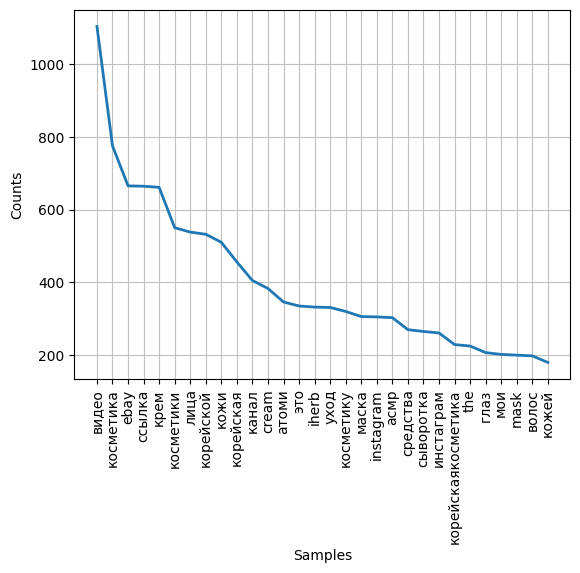

In [40]:
# 28 Гистограмма частот
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [41]:
fdist.most_common(20)

[('видео', 1103),
 ('косметика', 775),
 ('ebay', 665),
 ('ссылка', 664),
 ('крем', 661),
 ('косметики', 550),
 ('лица', 538),
 ('корейской', 532),
 ('кожи', 510),
 ('корейская', 456),
 ('канал', 405),
 ('cream', 383),
 ('атоми', 346),
 ('это', 335),
 ('iherb', 332),
 ('уход', 331),
 ('косметику', 320),
 ('маска', 306),
 ('instagram', 305),
 ('асмр', 303)]

In [42]:
# 29 Добавим stopwords

my_stop = {'видео', 'ссылка', 'инстаграм', 'instagram','iherb', 'подписаться'}

filtered_words = [w for w in words if w not in my_stop]

In [43]:
! poetry add wordcloud

The following packages are already present in the pyproject.toml and will be skipped:

  • wordcloud

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


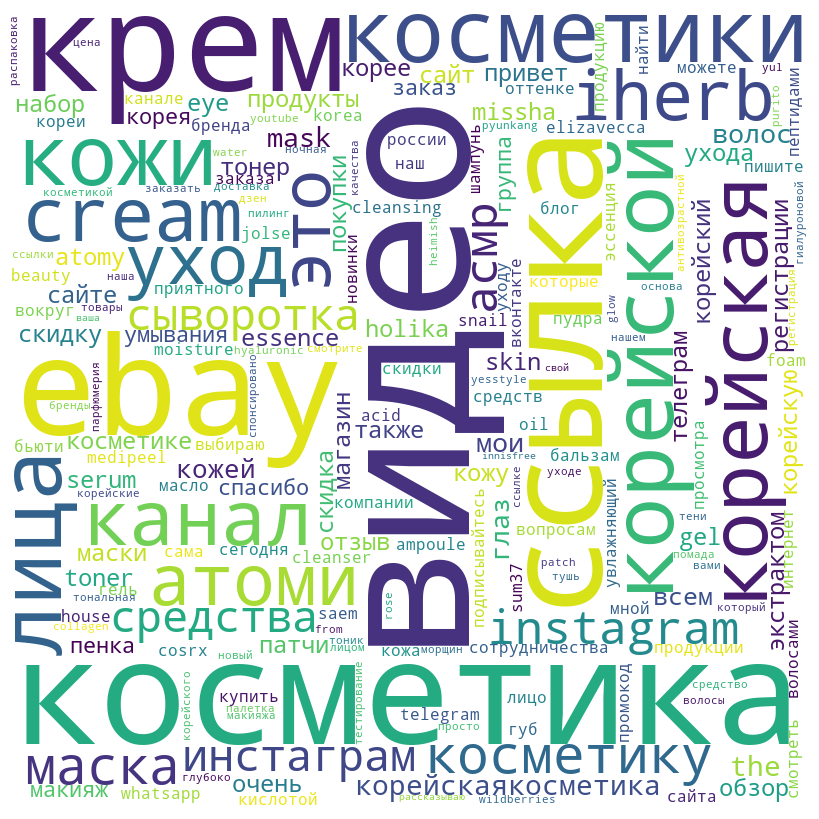

In [44]:
# 30 Облако слов

from wordcloud import WordCloud

all_string = ' '.join(filtered_words)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(fdist)


# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

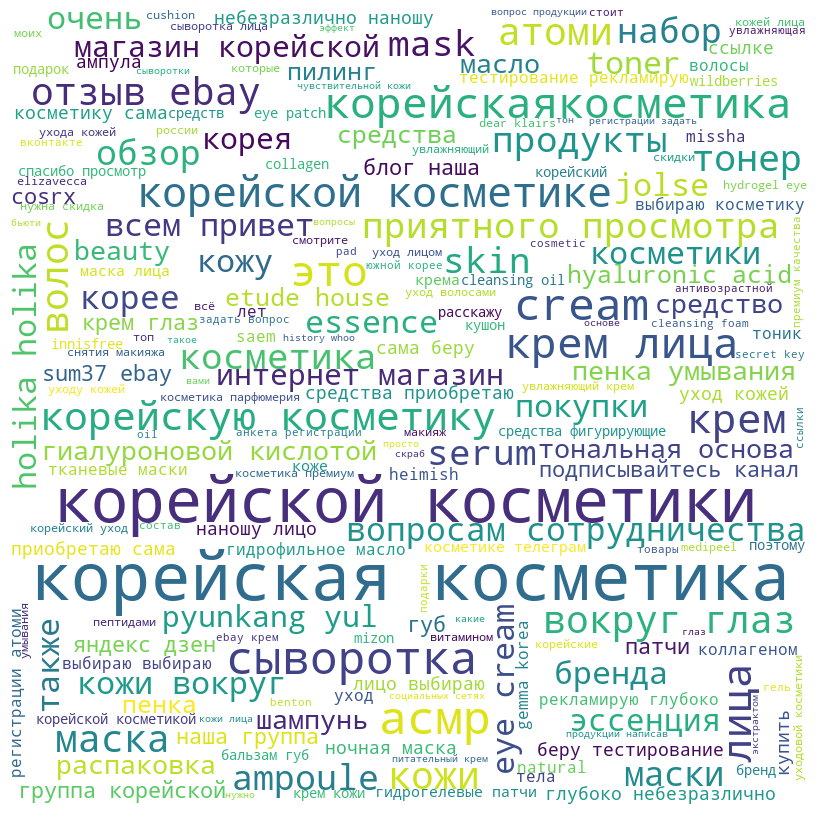

In [45]:
# 30 Облако слов

from wordcloud import WordCloud

all_string = ' '.join(filtered_words)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_text(all_string)


# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()